In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [340]:
print(df['sqft_lot'].isnull().sum())
print(df['bathrooms'].isnull().sum())

0
0


In [341]:
cols = ['sqft_lot', 'bathrooms']
n = int(0.05 * len(df))

for col in cols:
    random_indices = np.random.choice(df.index, n, replace=False)
    df.loc[random_indices, col] = np.nan


In [342]:
print(df['sqft_lot'].isnull().sum())
print(df['bathrooms'].isnull().sum())

1080
1080


<Axes: >

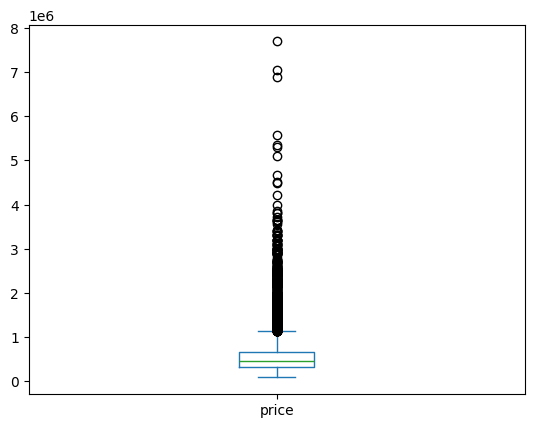

In [343]:
df['price'].plot.box()

<Axes: >

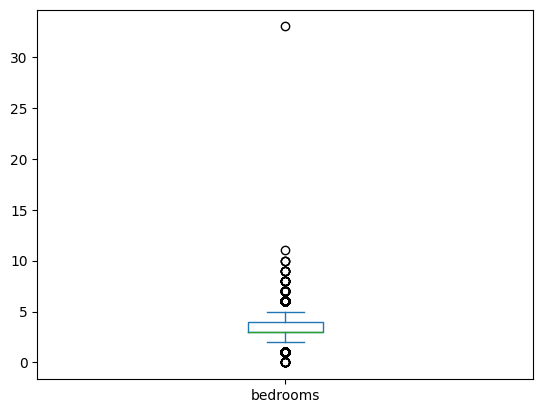

In [344]:
df['bedrooms'].plot.box()


<Axes: >

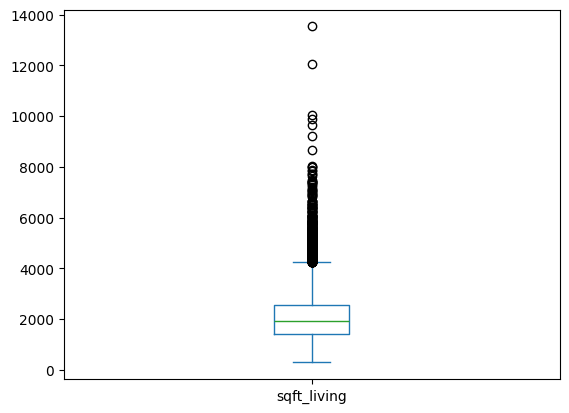

In [345]:
df['sqft_living'].plot.box()


In [346]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [347]:
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'sqft_living')
df = remove_outliers(df, 'bedrooms')


<Axes: >

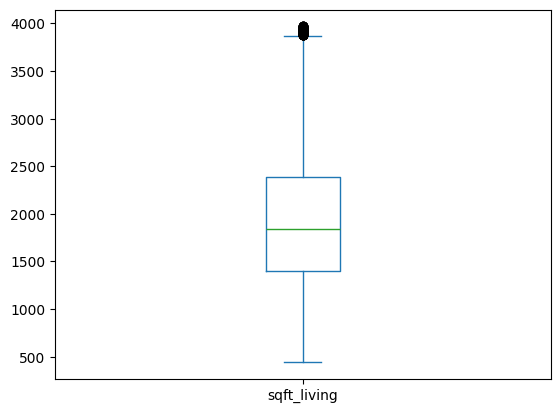

In [348]:
df['sqft_living'].plot.box()


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19687 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19687 non-null  int64  
 1   date           19687 non-null  object 
 2   price          19687 non-null  float64
 3   bedrooms       19687 non-null  int64  
 4   bathrooms      18697 non-null  float64
 5   sqft_living    19687 non-null  int64  
 6   sqft_lot       18696 non-null  float64
 7   floors         19687 non-null  float64
 8   waterfront     19687 non-null  int64  
 9   view           19687 non-null  int64  
 10  condition      19687 non-null  int64  
 11  grade          19687 non-null  int64  
 12  sqft_above     19687 non-null  int64  
 13  sqft_basement  19687 non-null  int64  
 14  yr_built       19687 non-null  int64  
 15  yr_renovated   19687 non-null  int64  
 16  zipcode        19687 non-null  int64  
 17  lat            19687 non-null  float64
 18  long       

In [350]:
df['date'] = pd.to_datetime(df['date'])
df['sale_year']=df['date'].dt.year
df['sale_month']=df['date'].dt.month
df['house_age']=df['sale_year']-df['yr_built']

In [351]:
import numpy as np
df['was_renovated'] = np.where(df['yr_renovated'] != 0, 1, 0)
df['was_renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: was_renovated, Length: 19687, dtype: int64

In [352]:
df['age_since_renovation']=np.where(df['was_renovated']!=0,df['sale_year']-df['yr_renovated'],df['house_age'])
df['age_since_renovation']

0        59
1        23
2        82
3        49
4        28
         ..
21608     5
21609     1
21610     5
21611    11
21612     6
Name: age_since_renovation, Length: 19687, dtype: int64

In [353]:
df["sqft_living_per_floor"] = np.where(
    df["floors"] != 0,
    df["sqft_living"] / df["floors"],
    np.nan
)
df['sqft_living_per_floor']

0        1180.0
1        1285.0
2         770.0
3        1960.0
4        1680.0
          ...  
21608     510.0
21609    1155.0
21610     510.0
21611     800.0
21612     510.0
Name: sqft_living_per_floor, Length: 19687, dtype: float64

In [354]:
df['bath_per_bed']=np.where(
    df['bedrooms']!=0,
    df['bathrooms']/df['bedrooms'],
    np.nan
)
df['bath_per_bed']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19687 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     19687 non-null  int64         
 1   date                   19687 non-null  datetime64[ns]
 2   price                  19687 non-null  float64       
 3   bedrooms               19687 non-null  int64         
 4   bathrooms              18697 non-null  float64       
 5   sqft_living            19687 non-null  int64         
 6   sqft_lot               18696 non-null  float64       
 7   floors                 19687 non-null  float64       
 8   waterfront             19687 non-null  int64         
 9   view                   19687 non-null  int64         
 10  condition              19687 non-null  int64         
 11  grade                  19687 non-null  int64         
 12  sqft_above             19687 non-null  int64         
 13  sqft_b

In [355]:
numeric_features=['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_living15','sqft_lot15','floors','sqft_above','sqft_basement','house_age','age_since_renovation','sqft_living_per_floor','bath_per_bed']
categorical_features=['waterfront','view','condition','grade','zipcode','was_renovated','sale_year','sale_month']
passthrough_features=['id','lat','long','yr_renovated','yr_built']

In [356]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("passthrough", "passthrough", passthrough_features)
    ]
)


In [357]:
from sklearn.model_selection import train_test_split

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [358]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

param_dists = {
    "Random Forest": {
        "regressor__n_estimators": [50, 100],
        "regressor__max_depth": [5, 10],
        "regressor__min_samples_split": [2, 5],
        "regressor__min_samples_leaf": [1, 2]
    },
    "Gradient Boosting": {
        "regressor__n_estimators": [50, 100],
        "regressor__learning_rate": [0.05, 0.1],
        "regressor__max_depth": [3, 5]
    },
    "XGBoost": {
        "regressor__n_estimators": [50, 100],
        "regressor__learning_rate": [0.05, 0.1],
        "regressor__max_depth": [3, 5],
        "regressor__subsample": [0.8, 1.0]
    }
}

best_models = {}
n_iter = 5  

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),  
        ("regressor", model)
    ])
    
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dists[name],
        n_iter=n_iter,
        cv=3,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    
    print(f"\nRunning RandomizedSearchCV for {name}...")
    search.fit(X_train, y_train)
    
    best_models[name] = search
    print(f"{name} best params: {search.best_params_}")
    print(f"{name} best CV RMSE: {(-search.best_score_)**0.5:.2f}")



Running RandomizedSearchCV for Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Random Forest best params: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 10}
Random Forest best CV RMSE: 83018.68

Running RandomizedSearchCV for Gradient Boosting...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Gradient Boosting best params: {'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
Gradient Boosting best CV RMSE: 74860.41

Running RandomizedSearchCV for XGBoost...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
XGBoost best params: {'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
XGBoost best CV RMSE: 74800.88


Best Model: XGBoost
Best Hyperparameters: {'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1}
R2 Score: 0.8663
MAE: 53267.14
RMSE: 74761.37


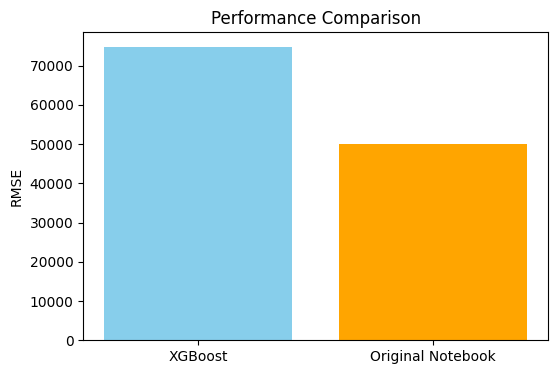

Percentage Improvement in RMSE: -49.52%


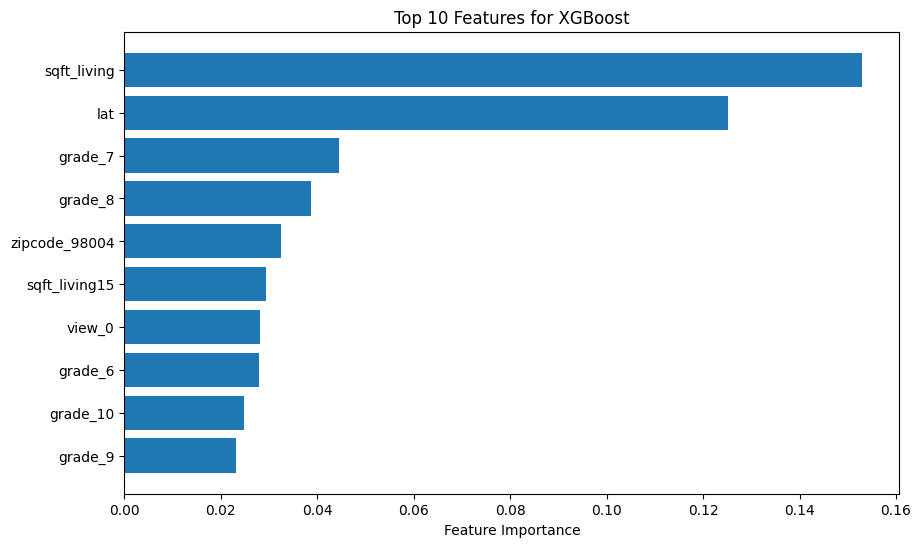

Top 5 Features:
           Feature  Importance
2      sqft_living    0.153036
120            lat    0.125174
28         grade_7    0.044553
29         grade_8    0.038657
36   zipcode_98004    0.032482


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

best_model_name = min(best_models, key=lambda x: -best_models[x].best_score_)
best_model = best_models[best_model_name]

print(f"Best Model: {best_model_name}")
print("Best Hyperparameters:", best_model.best_params_)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

original_rmse = 50000  

comparison_df = pd.DataFrame({
    "Model": [best_model_name, "Original Notebook"],
    "RMSE": [rmse, original_rmse]
})

plt.figure(figsize=(6,4))
plt.bar(comparison_df['Model'], comparison_df['RMSE'], color=['skyblue', 'orange'])
plt.ylabel("RMSE")
plt.title("Performance Comparison")
plt.show()

improvement = (original_rmse - rmse) / original_rmse * 100
print(f"Percentage Improvement in RMSE: {improvement:.2f}%")

if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
    model = best_model.best_estimator_['regressor']
    
    feature_names_num = numeric_features
    feature_names_cat = best_model.best_estimator_['preprocessor'] \
        .named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
    feature_names_passthrough = passthrough_features
    
    all_features = np.concatenate([feature_names_num, feature_names_cat, feature_names_passthrough])
    
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        "Feature": all_features,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10,6))
    plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
    plt.xlabel("Feature Importance")
    plt.title(f"Top 10 Features for {best_model_name}")
    plt.show()
    
    print("Top 5 Features:")
    print(importance_df.head(5))


Analysis of Top 5 Features

sqft_living – Largest influence on house price. Bigger living space directly increases value.

lat – Captures location differences; certain neighborhoods in King County are more expensive.

grade_7 – Houses with grade 7 construction quality; higher grade indicates better design/finishing.

grade_8 – Similar to grade 7; higher construction/quality level contributes to higher price.

grade_9 – Even better construction/design; consistent with the trend that better-built houses are costlier.